# Customer Churn previsions

In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
#Import Train dataset
df_train = pd.read_csv('projeto4_telecom_treino.csv')
df_train = df_train.iloc[:,1:]
df_train['type'] = "train"

#Import Test dataset
df_test = pd.read_csv('projeto4_telecom_teste.csv')
df_test = df_test.iloc[:,1:]
df_test['type'] = "test"

#Concatanate Train and Test data
df = pd.concat([df_train, df_test])

### Exploratory Train Data Analysis

In [49]:
# Evaluate missing values in the dataset
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
type                             0
dtype: int64

In [50]:
# Evaluate the number of unique elements in the dataset
df.nunique()

state                              51
account_length                    218
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churn                               2
type                                2
dtype: int64

In [51]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Chart for Yes/No distribution by state

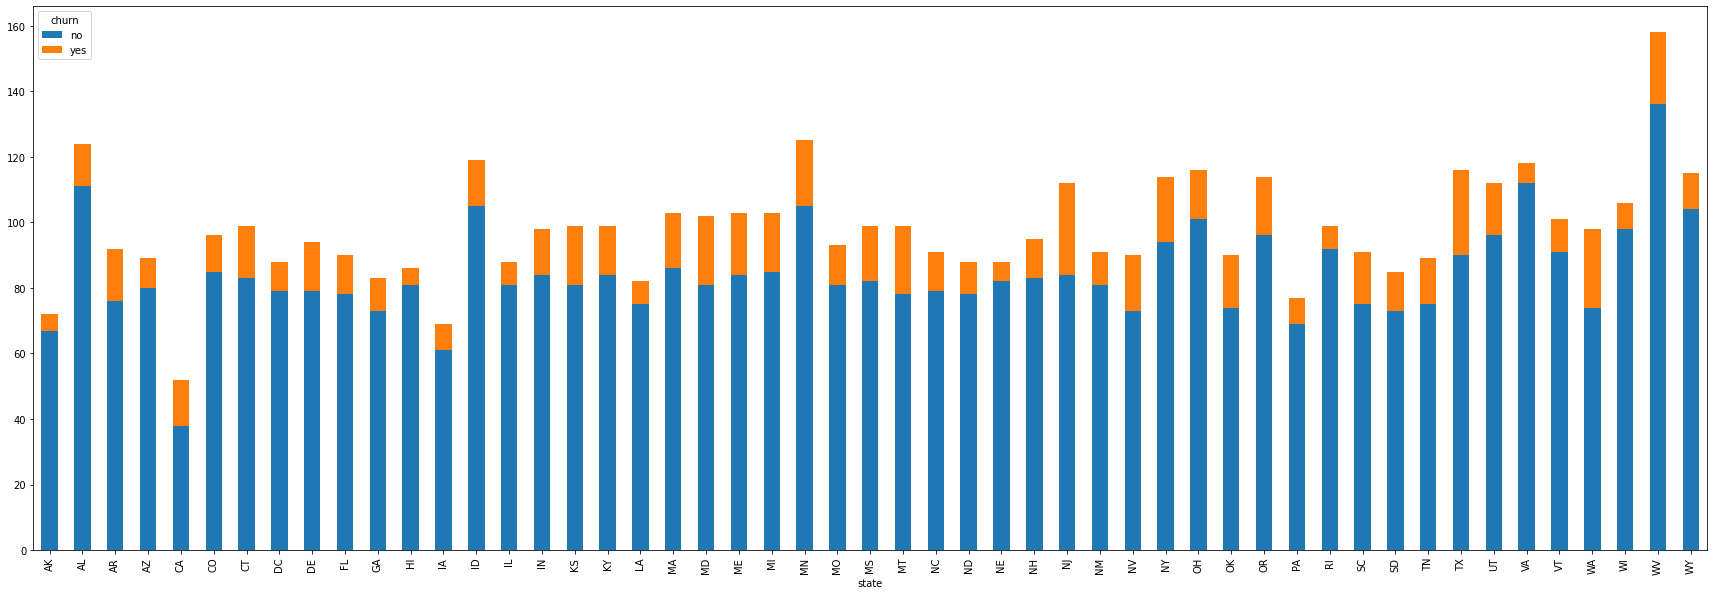

In [52]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

Chart of Churn distribution by State

In [126]:
df_percentage = df_train[["state", 'churn']]
graph = pd.crosstab(df_percentage.state,df_percentage.churn).reset_index()
graph['sum'] = graph['no'] + graph['yes']
graph['%_no'] = graph['no'] / graph['sum']
graph['%_yes'] = graph['yes'] / graph['sum']
graph = graph.round({'%_yes': 2, '%_no': 2})

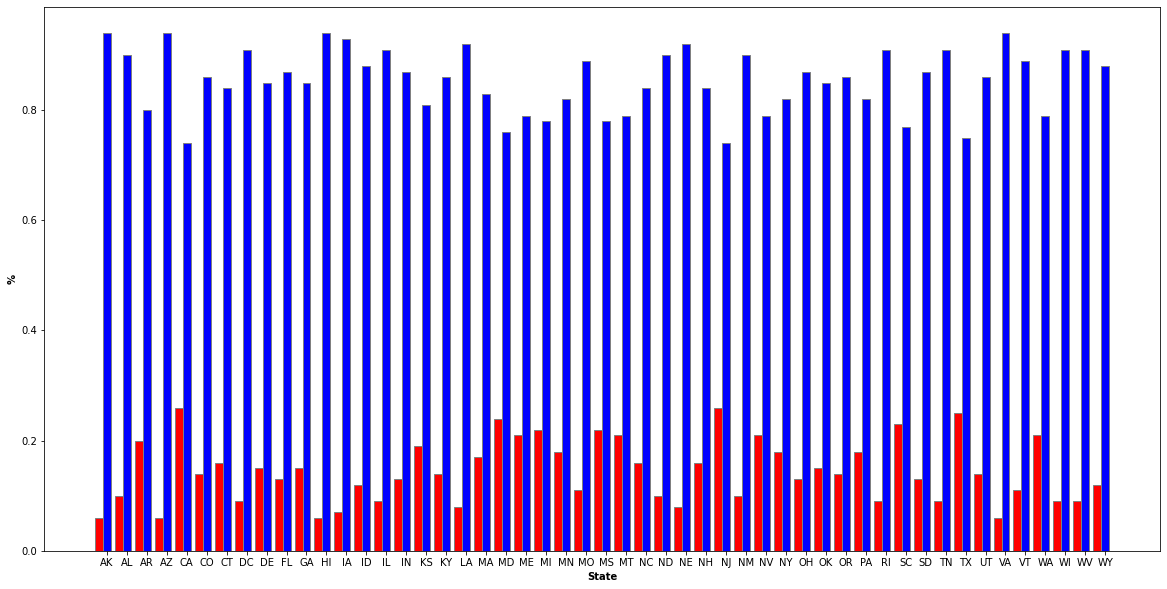

In [157]:
# set width of bar 
barWidth = 0.4
fig = plt.subplots(figsize =(20, 10)) 
   
# set height of bar 
Yes = graph['%_yes']
No = graph['%_no']
   
# Set position of bar on X axis 
br1 = np.arange(len(graph['state'])) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Yes, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Yes') 
plt.bar(br2, No, color ='b', width = barWidth, 
        edgecolor ='grey', label ='No') 
   
# Adding Xticks  
plt.xlabel('State', fontweight ='bold') 
plt.ylabel('%', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(graph['state']))], 
           graph['state']) 
   
plt.show() 

## Encoding

In [53]:
# Creating encoder
lb = LabelEncoder()

# Applying encoder in the variables with string values
df['international_plan'] = lb.fit_transform(df['international_plan'])
df['voice_mail_plan'] = lb.fit_transform(df['voice_mail_plan'])
df['churn'] = lb.fit_transform(df['churn'])
df['area_code'] = lb.fit_transform(df['area_code'])
df['state'] = lb.fit_transform(df['state'])

# Changing type of the variables
df["account_length"] = df["account_length"].astype('int64')
df["area_code"] = df["area_code"].astype('int64')
df["international_plan"] = df["international_plan"].astype('int64')
df["voice_mail_plan"] = df["voice_mail_plan"].astype('int64')
df["churn"] = df["churn"].astype('category')
df["state"] = df["state"].astype('int64')

In [55]:
df.dtypes

state                               int64
account_length                      int64
area_code                           int64
international_plan                  int64
voice_mail_plan                     int64
number_vmail_messages               int64
total_day_minutes                 float64
total_day_calls                     int64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                     int64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                   int64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                    int64
total_intl_charge                 float64
number_customer_service_calls       int64
churn                            category
type                               object
dtype: object

## Correlation

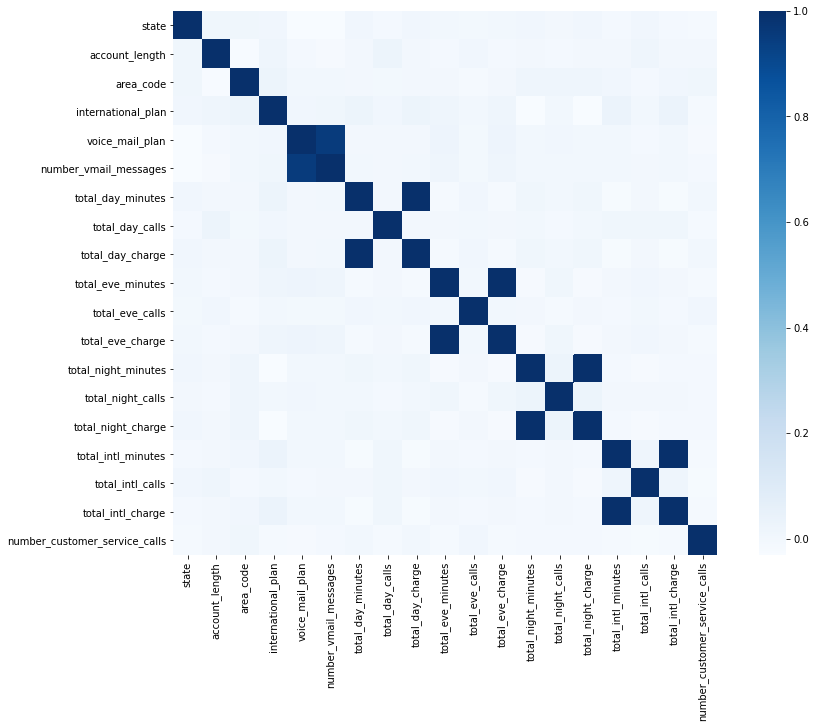

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="Blues", vmax = 1., square = True)

## Feature Selection

In [57]:
# Feature Selection using Extra Trees Classifier

array = df.values

X = array[:,0:19]
y = array[:,19]
y = y.astype('int')

# Model - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

# Print results
print(df.columns[0:20])
print(modelo.feature_importances_)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')
[0.03217237 0.03160265 0.02201218 0.07244719 0.02264048 0.01490388
 0.12632542 0.03326352 0.12599929 0.05749919 0.03197776 0.05764195
 0.03775311 0.03126784 0.03856681 0.04555959 0.05262892 0.04425369
 0.12148415]


In [61]:
# Removing variables before fit the model
new_df = df.drop(['area_code', 'voice_mail_plan', 'number_vmail_messages', 'state', 'international_plan', "type"], axis=1)

#Separating target variable
df_target = new_df['churn']
df2 = new_df.drop(['churn'], axis=1)

## Normalizing data

In [68]:
#Normalizing df data
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm['state'] = df['state']
df_norm['international_plan'] = df['international_plan']
df_norm['type'] = df['type']
df_norm['churn'] = new_df['churn']

In [70]:
#Split df into train and test data
df_test_norm, df_train_norm = df_norm[df_norm["type"].eq("test")], df_norm[df_norm["type"].eq("train")]
df_train_norm = df_train_norm.drop(["type"], axis=1)
df_test_norm = df_test_norm.drop(["type"], axis=1)

## Analysing if the target variable is balanced

Balance data for train data

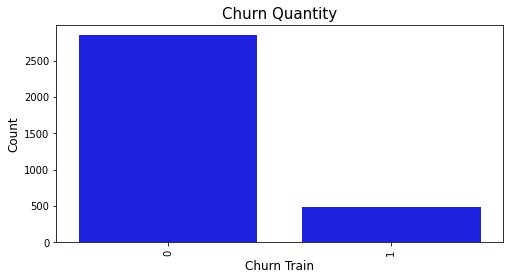

In [87]:
#Check if variable target "Churn" is balanced
plt.figure(figsize=(8,4))
sns.countplot(x="churn", data = df_train_norm, color = 'b')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Churn Train', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churn Quantity", fontsize=15)
plt.show()

As we can see, the "Churn" is not balanced. Let's balance train data

In [81]:
from imblearn.over_sampling import SMOTE

#Balancing df_train
X1 = df_train_norm.iloc[:, 0:16]
y1 = df_train_norm.iloc[:, 16]

# Creating SMOTE
smote_bal = SMOTE(random_state = 100)
X_res_train, y_res_train = smote_bal.fit_resample(X1, y1)

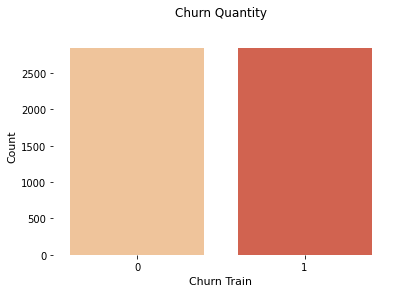

In [88]:
# Plot 
sns.countplot(y_res_train, palette = "OrRd")
plt.box(False)
plt.xlabel('Churn Train', fontsize = 11)
plt.ylabel('Count', fontsize = 11)
plt.title('Churn Quantity\n')
plt.show()

Balance data for test data

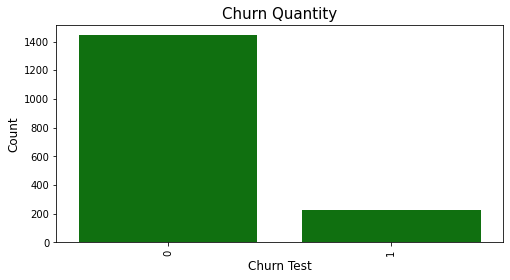

In [89]:
#Check if variable target "Churn" is balanced
plt.figure(figsize=(8,4))
sns.countplot(x="churn", data = df_test_norm, color = 'g')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Churn Test', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Churn Quantity", fontsize=15)
plt.show()

As we can see, the "Churn" is not balanced. Let's balance test data

In [84]:
#Balancing df_test
X2 = df_test_norm.iloc[:, 0:16]
y2 = df_test_norm.iloc[:, 16]

# Creating SMOTE
smote_bal2 = SMOTE(random_state = 100)
X_res_test, y_res_test = smote_bal2.fit_resample(X2, y2)

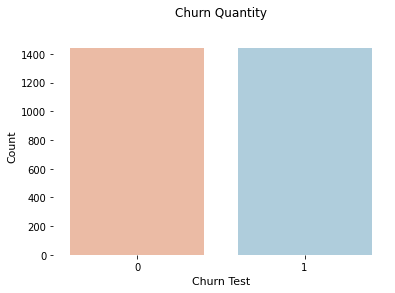

In [90]:
# Plot 
sns.countplot(y_res_test, palette = "RdBu")
plt.box(False)
plt.xlabel('Churn Test', fontsize = 11)
plt.ylabel('Count', fontsize = 11)
plt.title('Churn Quantity\n')
plt.show()

In [91]:
# Transforming dataset into array
df_train_array = X_res_train.values
df_train_target_array = y_res_train.values

df_test_array = X_res_test.values
df_test_target_array = y_res_test.values

## Predictive Analysis

In [92]:
# Defining values to the numbre of folds
num_folds = 10
seed = 7

# Separating data in folds
kfold = KFold(num_folds, True, random_state = seed)

# Definindo o número de trees
num_trees = 100

1) Logistic Regression

In [93]:
# Creating the model
modelo_v1 = LogisticRegression()

# Cross Validation
results_v1 = cross_val_score(modelo_v1, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v1.mean() * 100))

Acurácia: 76.246


2) CART (Classification and Regression Trees)

In [94]:
# Creating the model
modelo_v2 = DecisionTreeClassifier()

# Cross Validation
results_v2 = cross_val_score(modelo_v2, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v2.mean() * 100))

Acurácia: 88.228


3) Bagged Decision Trees

In [95]:
# Create unitary model
cart = DecisionTreeClassifier()

# Creating the model
modelo_v4 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)

# Cross Validation
results_v4 = cross_val_score(modelo_v4, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v4.mean() * 100))

Acurácia: 92.772


4) Random Forest

In [96]:
max_features = 3

# Creating the model
modelo_v5 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
results_v5 = cross_val_score(modelo_v5, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v5.mean() * 100))

Acurácia: 92.018


5) Gradient Boosting

In [97]:
# Creating the model
modelo_v7 = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
results_v7 = cross_val_score(modelo_v7, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v7.mean() * 100))

Acurácia: 93.333


6) Adaboost

In [98]:
# Creating the model
modelo_v8 = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
results_v8 = cross_val_score(modelo_v8, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v8.mean() * 100))

Acurácia: 87.246


7) XGBoost

In [99]:
# Creating the model
modelo_v9 = XGBClassifier()

# Cross Validation
results_v9 = cross_val_score(modelo_v9, df_train_array, df_train_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (results_v9.mean() * 100))

Acurácia: 95.509


LR: 0.718772 (0.030820)
CART: 0.874737 (0.020508)
Decision Trees: 0.872105 (0.019917)
RF: 0.907719 (0.017336)
GB: 0.930877 (0.021859)
AB: 0.874035 (0.027109)
XGB: 0.952807 (0.024680)


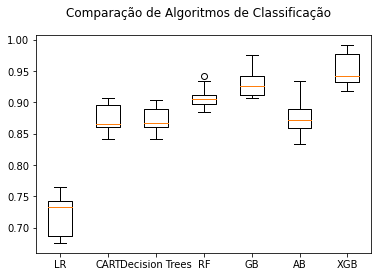

In [100]:
# Preparing model list
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Decision Trees', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))

# Evaluating each model in one loop
results_total = []
names = []

for name, model_total in models:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model_total, df_train_array, df_train_target_array, cv = kfold, scoring = 'accuracy')
    results_total.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot to compare the algorithms
fig = plt.figure()
fig.suptitle('Comparing Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_total)
ax.set_xticklabels(names)
plt.show()

## Testing Data

In [101]:
# Using model "Logistic Regression"
y_pred_1 = cross_val_score(modelo_v1, df_test_array, df_test_target_array, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (y_pred_1.mean() * 100))

Acurácia: 70.302


In [102]:
# Using model "CART"
y_pred_2 = cross_val_score(modelo_v2, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_2.mean() * 100))

Acurácia: 87.979


In [103]:
# Using model "Bagged Decision Trees"
y_pred_3 = cross_val_score(modelo_v4, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_3.mean() * 100))

Acurácia: 92.273


In [104]:
# Using model "Random Forest"
y_pred_4 = cross_val_score(modelo_v5, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_4.mean() * 100))

Acurácia: 91.127


In [105]:
# Using model "Gradient Boosting"
y_pred_5 = cross_val_score(modelo_v7, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_5.mean() * 100))

Acurácia: 93.142


In [106]:
# Using model "AdaBoost"
y_pred_6 = cross_val_score(modelo_v8, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_6.mean() * 100))

Acurácia: 83.471


In [107]:
# Using model "XGBoost"
y_pred_7 = cross_val_score(modelo_v9, df_test_array, df_test_target_array, cv = kfold)

# Print
print("Acurácia: %.3f" % (y_pred_7.mean() * 100))

Acurácia: 95.776


### Conclusion

- The best models for this dataset are Random Forest and XGBoost. It has an accurancy of 95%